# Dynamic Modeling of Greenhouse Gases

## Introduction



Greenhouse gas (GHG) emissions pose a great threat to human health and the environment and have a big effect on climate change. Hence, it is important to keep track of the greenhouse gases in the atmosphere and describe their accumulation in the atmosphere.

Given the data of $N_2O$ in the atmosphere versus time, and given the data for $N_2O$ emissions, we could use linear approximation via the least squares method on Python, to fit the data into a function. The absorption of $N_2O$ into the ocean is taken into account.

We will model the change of $N_2O$ levels using a forced first-order differential equation. This procedure has been done in literature for $CO_2$(reference: Lohmander P. Dynamics and control of the CO2 level via a differential equation and alternative global emission strategies. Int Rob Auto J .2020;6(1):7-15. [DOI: 10.15406/iratj.2020.06.00197](https://medcraveonline.com/IRATJ/IRATJ-06-00197.pdf)), but we will use what we learned in class to reproduce the results on Python.

This procedure can be done for the other greenhouse gas emissions. Hence, we could develop theoretical models to study the dynamics of $CO_2, C{H_4}$, and $N_2O$ and to predict their future emissions depending on several strategies implemented to decrease anthropogenic greenhouse gas emissions.

I have worked on this project with two other teammates, Joelle and Sanjana. Each of us carried out this project for one gas each:
*  Joelle Guisso: $CO_2$
*  Sanjana Polavarapu: $CH_4$
*  Sheena Kapoor: $N_2O$ (Me)


## Method



#### Importing Data

1. Importing and plotting data from literature:

  *   https://gml.noaa.gov/ccgg/trends/data.html
  *   https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE

   The data to be imported for each GHG:
  *   Concentration of GHG in the atmosphere
  *   GHG emissions

In the code below, files are imported for the $N_2O$ emissions (named dnox), and concentration in ppb (named ppb). For the project, the data for $N_2O$ emissions is taken from 1990-2018 (since the trend was not linear for the period before that), while the data for the concentration in ppb is available from 1990-2019, so we just model for the common timeline (1990-2018)

In [1]:
#importing data for emissions of the gases
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

un = 'https://drive.google.com/file/d/1tpgegFha-DjTtVjxTwZ6HLHt6VT32vBp/view?usp=sharing'
un2 = 'https://drive.google.com/uc?id=' + un.split('/')[-2]
dfnox = pd.read_csv(un2, header=2, index_col=False,
            names=(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] 
                   + [str(x) for x in np.arange(1960, 2019)]))
dnox = dfnox.to_numpy()
print(dnox[259][14:]) #NOx emission values for world data 

[2202797.89810201 2065702.93703825 2220995.22539263 2265472.40012826
 2215856.85342201 2306421.33260793 2388852.13695081 2500861.93655073
 2527994.65594719 2685624.9877439 2707871.06786716 2612070.20827411
 2781256.60743071 2756521.51921777 2670803.62233235 2672022.14412628
 2722859.06086061 2904171.49790569 2765735.75918212 2815144.20851293
 2332460.0 2323020.0 2316620.0 2302630.0 2394530.0 2449660.0 2492480.0
 2463240.0 2475630.0 2477050.0 2485920.0 2498020.0 2536790.0 2542580.0
 2613880.0 2625710.0 2658770.0 2710520.0 2696680.0 2694510.0 2741480.0
 2834570.0 2847630.0 2838990.0 2881840.0 2904970.0 2934600.0 2986520.0
 2984340.0]


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [2]:
from google.colab import files
uploaded = files.upload() 

Saving N2O_amount.csv to N2O_amount.csv


In [3]:
#importing the data for nitrous oxide concentration 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = np.loadtxt('N2O_amount.csv', delimiter= ',', dtype=float)
year = data[:,0]
ppb = data[:,1]

print(year[0],ppb[0]) #1st values of year and concentration

1990.0 308.06


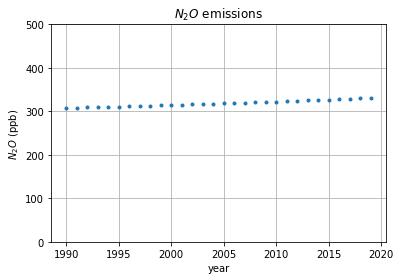

In [4]:
plt.plot(year, ppb, '.')
plt.xlabel('year')
plt.ylabel('$N_2O$ (ppb)')
plt.grid()
plt.title('$N_2O$ emissions');
plt.ylim(0,500);

**Conversion: ppb to Gt-** (equivalent)

$\frac{1}{1000}\ ppb = 1\ ppm$

$1\ ppm\ CO_2 = 2.13 Gt$ $C$ $\times \frac{0.083 mol CO_2}{1 g C} = 2.13 Gt$ $C$ $\times \frac{3.664 g CO_2}{1 g C} = 7.80432 Gt$ $CO_2$

Hence,

$1\ ppb = 7.80432\times 1000\ Gt\ CO_2\ $

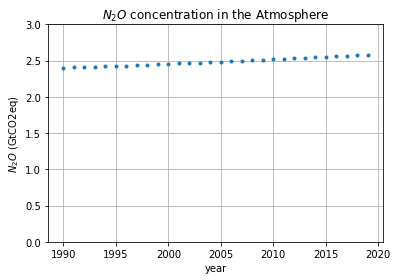

In [5]:
mtnox = ppb*7.80432*1000
gtnox = mtnox*1e-6 #thousand metric tons to gigaton
plt.plot(year, gtnox, '.')
plt.xlabel('year')
plt.ylabel('$N_2O$ (GtCO2eq)')
plt.grid()
plt.title('$N_2O$ concentration in the Atmosphere');
plt.ylim(0,3);

### Parameter Estimation
#### The emission forced differential equation of the global $N_2O$ level

First we determine the parameters for the differential equation and plotting the change in GHG in the atmosphere (without the effect of changes in GHG emissions)

$\dot x = \frac{dx}{dt} = a_0$

$x(t)$ is the taken as the $N_2O$ level in the atmosphere as a function of time.
So, $\dot x$ is the change per unit time. We know that the constant natural emissions (from oceans, soils etc ([reference](https://sci-hubtw.hkvisa.net/10.1038/s41586-020-2780-0))) are greater than 0. Hence,  $\dot x$ is a positive term and would increase with time given no additional constraints. 

Here, I made an assumption that $N_2O$ is mostly absorbed into the oceans and that the absorption is linearly proportional to the $N_2O$ in the atmosphere ($x$). 

Assumptions are made in the formulation of the differential equation that governs the change of $N_2O$ in the atmosphere. $N_2O$ increases linearly with time as the absorption rate of this gas in the ocean is linearly proportional to the concentration $x$ in the atmosphere. This is because we can assume that the probability that a $N_2O$ molecule will touch the surface of the sea is
proportional to the $N_2O$ level in atmosphere. We can forumulate the equation with absorption ($-a_xx$), considering no emissions as:
\begin{equation}
\frac{dx}{dt} = a_0 +a_xx
\end{equation}

If there is no change in the concentration in the atmosphere, 
\begin{equation}
\frac{dx}{dt} = 0
\end{equation}
Hence, the equilibrium concentration of $N_2O$ in the atmosphere would be:
\begin{equation}
x_{eq} = \frac{-a_0}{a_x}
\end{equation}

Still, emissions exist due to natural soil/agriculture etc and we account for it by adding a term to the differential equation. We already have that data as a function of time. This factor will be $z(t)$. 
\begin{equation}
\frac{dx}{dt} = a_0 +a_xx + z(t) 
\end{equation}
where,
\begin{equation}
z(t) = m_0 + m_1(t-1990)
\end{equation}
Using the data of emissions, we will estimate the values of $m_0$ and $m_1$ using linear regression.

m0 = 2.28
m1 = 0.02
R^2 = 0.975


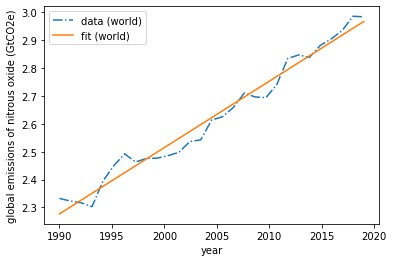

In [6]:
#Curve fit for global emissions of n2o
from scipy.optimize import minimize
from scipy.integrate import odeint
from scipy.optimize import curve_fit

def gemn(t,m0,m1):  #global emission of nitrous oxide
  return (m0+m1*(t-1990))

dnoxx = 1e-6*dnox[259][34:]
initial_guess = [1,1]
xfit = np.linspace(1990,2019,29)
pars, pcov = curve_fit(gemn, xfit, dnoxx, p0=initial_guess)
[m0,m1] = pars

#plot
plt.plot(xfit,dnoxx,'-.',label='data (world)')
plt.plot(xfit,gemn(xfit,*pars),label='fit (world)')
plt.xlabel('year')
plt.ylabel('global emissions of nitrous oxide (GtCO2e)') #units in Gt CO2 equivalent
plt.legend();

p = np.array(['m0','m1'])
for i, par in enumerate(pars):
    print(f'{p[i]} = {par:1.2f}')

# R^2 calculation
r = dnoxx - gemn(xfit, *pars)
Rsqd = 1 - (np.sum(r**2) / np.sum((dnoxx-np.mean(dnoxx))**2))
print(f'R^2 = {Rsqd:1.3f}')

The data we have for the $N_2O$ concentration in the atmosphere accounts for both the absorption into the atmosphere and the emissions. 
The above code snippet was to estimate the parameters $m_0$ and $m_1$ and now we calculate $\frac{\Delta x}{\Delta t}$ using the data we have for the $N_2O$ concentration.

$\frac{dx}{dt} = a_0 +a_xx + m_0 + m_1(t-1990) $

$y_i = \frac{\Delta x}{\Delta t} - z_i = a_0 +a_xx $

Hence, we can estimate the absorption parameters $a_0$ and $a_x$ using linear regression.

The snippet below depicts a table that shows the following parameters in every column (numbered below).

1.   $i:$ Period
2.   Year $t$
3.   $N_2O$ in atmosphere (ppb)
4.   $\Delta x$ calculated (ppb)
5.   $\Delta t$ calculated (years)
6.   Average concentration $x_i$ (ppb)
7.   Average concentration $x_i$ (Gt)
8.   $\frac{\Delta x}{\Delta t}$ calculated (ppb/year) 
9.   $\frac{\Delta x}{\Delta t}$ calculated (Gt/year) 
10.  $γ_t:$ ($N_2O$ emissions data for each year) (Gt)
11.   $z_i:$ Average $N_2O$ emissions in each period (Gt/year)
12.   $y_i:$ The negative of the difference between average $N_2O$ emissions in each period and $\frac{\Delta x}{\Delta t}$ calculated (Gt/year) (absorption factor in ocean)
13.   $y_i$ (ppb/year) (used for the linear regression using curve_fit to find the absorption parameters)


In [7]:
np.set_printoptions(precision=3)
d = np.zeros([4,13])
d[0,1] = 1990

for i, par in enumerate(d[1:,1:]):
  d[i+1,0] = d[i,0] +1                      #index
  d[i+1,1] = d[i,1] +10
  d[3,1] = 2018                             #year
  d[i,2] = ppb[i*10]                        #N2O in atmosphere
  d[3,2] = ppb[-1]    

for i, par in enumerate(d[1:,1:]):
  d[i+1,3] = d[i+1,2] - d[i,2]              #difference in N2O in atmosphere
  d[i+1,4] = d[i+1,1] - d[i,1]              #difference in years
  d[i+1,5] = (d[i+1,2] + d[i,2])/2          #avg ppb N2O in the time period
  d[i+1,6] = 1e-6*7.80432*1000*d[i+1,5]     #avg Gt N2O in the time period
  d[i+1,7] = d[i+1,3]/d[i+1,4]              #change of ppb per year
  d[i+1,8] = 1e-6*7.80432*1000*d[i+1,7]     #change of Gt N2O per year       
  d[i,9] = 1e-6*dnox[259][4:][i*10+30]      #N2O emissions data
  d[3,9] = 1e-6*dnox[259][4:][-1]

for i, par in enumerate(d[1:,1:]):
  d[i+1,10] = (d[i+1,9] + d[i,9])/2         #average N2O emissions in the time period
  d[i+1,11] = d[i+1,8] - d[i+1,10]          #yi (ppb) (very small values observed)
  d[i+1,12] = -1e-6*d[i+1,10]/7.80432/1000

np.set_printoptions(suppress=True) 
np.set_printoptions(precision=11)
#print(d);

#printing the table 
from tabulate import tabulate
table = [['Period','Year', 'N\u2082O(ppb)', '\u0394x','\u0394t','x\u1D62(ppb)','x\u1D62(Gt)',\
          '\u0394x/\u0394t(ppb)'], 
         [d[0,1],d[0,2],d[0,3],d[0,4],d[0,5],d[0,6],d[0,7],d[0,8]], \
         [d[1,1],d[1,2],d[1,3],d[1,4],d[1,5],d[1,6],d[1,7],d[1,8]], \
         [d[2,1],d[2,2],d[2,3],d[2,4],d[2,5],d[2,6],d[2,7],d[2,8]], \
         [d[3,1],d[3,2],d[3,3],d[3,4],d[3,5],d[3,6],d[3,7],d[3,8]] ]
         
print(tabulate(table, headers='firstrow',showindex = True, tablefmt='fancy_grid'))

╒════╤══════════╤════════╤════════════╤══════╤════════╤═══════════╤══════════╤══════════════╕
│    │   Period │   Year │   N₂O(ppb) │   Δx │     Δt │   xᵢ(ppb) │   xᵢ(Gt) │   Δx/Δt(ppb) │
╞════╪══════════╪════════╪════════════╪══════╪════════╪═══════════╪══════════╪══════════════╡
│  0 │     1990 │ 308.06 │       0    │    0 │   0    │   0       │    0     │   0          │
├────┼──────────┼────────┼────────────┼──────┼────────┼───────────┼──────────┼──────────────┤
│  1 │     2000 │ 314.8  │       6.74 │   10 │ 311.43 │   2.4305  │    0.674 │   0.00526011 │
├────┼──────────┼────────┼────────────┼──────┼────────┼───────────┼──────────┼──────────────┤
│  2 │     2010 │ 322.42 │       7.62 │   10 │ 318.61 │   2.48653 │    0.762 │   0.00594689 │
├────┼──────────┼────────┼────────────┼──────┼────────┼───────────┼──────────┼──────────────┤
│  3 │     2018 │ 330.74 │       8.32 │    8 │ 326.58 │   2.54873 │    1.04  │   0.00811649 │
╘════╧══════════╧════════╧════════════╧══════╧════════╧═════

In [8]:
#printing the table 
from tabulate import tabulate
table = [['\u0394x/\u0394t(Gt)', 'γ\u209c(Gt)','z\u1D62(Gt/year)',\
          'y\u1D62(Gt/year)','y\u1D62(ppb/year)'], 
         [d[0,9],d[0,10],d[0,11],d[0,12]], \
         [d[1,9],d[1,10],d[1,11],d[1,12]], \
         [d[2,9],d[2,10],d[2,11],d[2,12]], \
         [d[3,9],d[3,10],d[3,11],d[3,12]] ]
         
print(tabulate(table, headers='firstrow',showindex = True, tablefmt='fancy_grid'))

╒═════════════╤══════════╤═══════════════╤═══════════════╤════════════════╕
│   Δx/Δt(Gt) │   γₜ(Gt) │   zᵢ(Gt/year) │   yᵢ(Gt/year) │   yᵢ(ppb/year) │
╞═════════════╪══════════╪═══════════════╪═══════════════╪════════════════╡
│           0 │  2.33246 │       0       │       0       │    0           │
├─────────────┼──────────┼───────────────┼───────────────┼────────────────┤
│           1 │  2.48592 │       2.40919 │      -2.40393 │   -3.087e-10   │
├─────────────┼──────────┼───────────────┼───────────────┼────────────────┤
│           2 │  2.74148 │       2.6137  │      -2.60775 │   -3.34904e-10 │
├─────────────┼──────────┼───────────────┼───────────────┼────────────────┤
│           3 │  2.98434 │       2.86291 │      -2.85479 │   -3.66837e-10 │
╘═════════════╧══════════╧═══════════════╧═══════════════╧════════════════╛


We can derive a function for the absorption into the atmosphere using the data we have for the the total change in $N_2O$ (Column 9) and the anthropogenic increase in $N_2O$ (Column 11) in different time periods. Column 12 includes the regression data, $y_i$.

Similar to how we estimated $m_0$ and $m_1$, $a_0$ and $a_x$ are estimated using linear regression.

$y_i = a_0 +a_xx $

In [9]:
np.set_printoptions(precision=4)
# average ppb N2O in the time period
print(f'x = {d[1:,5]}')
# Empirical data for the change in N2O as a result of absorption
print(f'y = {d[1:,11]}')

x = [311.43 318.61 326.58]
y = [-2.4039 -2.6078 -2.8548]


a0 = 6.875
ax = -0.030
xeq = 230.830 ppb
R^2 = 0.999


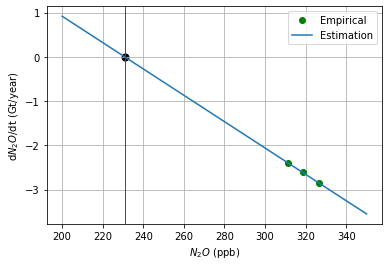

In [10]:
yi = d[1:,11]
xfitt = d[1:,5]

# Defining function to estimate the change in N2O due to absorption
def ab(x,a0,ax):
  return (a0+ax*(x))

#fitting curve for the function above
ig = [10,10]
parss, pcovv = curve_fit(ab, xfitt, yi, p0=ig)

xaxis = np.linspace(200,350,6)
[a0, ax] = parss #parameters

#plots
plt.plot(xfitt,yi,'go',label='Empirical')
plt.plot(xaxis,ab(xaxis,*parss),'-',label='Estimation')
plt.axvline(-a0/ax, linewidth=1, color='r')

#equilibrium concentration of N2O in the atmosphere
plt.scatter(-a0/ax, 0,c='k', s=50)

plt.xlabel('$N_2O$ (ppb)')
plt.ylabel('d$N_2O$/dt (Gt/year)')
plt.legend()
plt.grid()

a = np.array(['a0','ax'])
for i, par in enumerate(parss):
    print(f'{a[i]} = {par:1.3f}')

xeq = -a0/ax
print(f'xeq = {xeq:1.3f} ppb')

#R^2 calculations
res = yi - ab(xfitt,*parss)
rsq = 1 - (np.sum(res**2) / np.sum((yi-np.mean(yi))**2))
print(f'R^2 = {rsq:1.3f}')

$x_{eq} = \frac{-a_0}{a_x} = \frac{-6.875}{-0.030} = 230.830$ ppb

When there are no emissions in the atmosphere, i.e. $\frac{dN_2O}{dt} = 0$, the concentration of $N_2O$ in the atmosphere would be at a constant value of about $230.830$ ppb.
The linear model seems to fit really well the data for the absorption as well as $R^2 = 0.999$.


### Determining the differential equation considering the dynamic change of $N_2O$ emissions

Now, we have to integrate the differential equation to find the solution-

$\frac{dx}{dt} = a_0 +a_xx + m_0 + m_1(year-1990) $

$\frac{dx}{dt} = 6.875 - 0.030x + 2.28 + 0.02(year-1990) $

Using the conversion from above for ppb to GtCO2 equivalent, we get:

$\frac{dx}{dt} = \frac{6.875 - 0.030x + 2.28 + 0.02(year-1990)}{7.80432\times 1000\times 1e-6} $


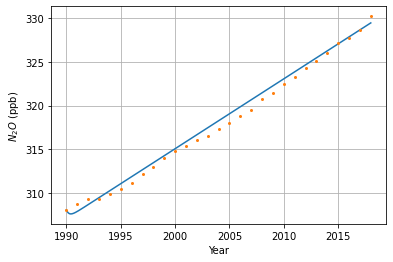

In [11]:
from scipy.integrate import odeint

def fn(x,t1):
  return (a0 + ax*x + m0 + m1*t1)/(7.80432/1000)       #t1 = year - 1990
t1 = np.linspace(0,28,1000)
x0 = np.array([ppb[0]])
sol = odeint(fn,x0,t1)
# print(sol)

plt.plot(t1 +1990, sol, label='Model')
plt.plot(year[:-1], ppb[:-1], 'o',markersize='2', label='Data')
plt.xlabel('Year')
plt.ylabel('$N_2O$ (ppb)')
plt.grid()

To cross check, I also used the method shown in the [paper](https://medcraveonline.com/IRATJ/IRATJ-06-00197.pdf) to solve for a homogeneous differential equation.


$\frac{dx}{dt}=a_{0}+a_{x} x+m_{0}+m_{1} t$

$\dot{x}_{h}-a_{x} x_{h}=0 $

$x_{h}=A e^{s t} $

$\dot{x}_{h}=s A e^{s t} $

$\left(s-a_{x}\right) x_{h}=0$

$\left(x_{h} \neq 0\right) \Rightarrow s=a_{x} $

$x_{h}(t)=A e^{a_{x} t}$

Determination of the particular solution:

$x_{p}=k_{0}+k_{1} t $

$\dot{x}_{p}-a_{x} x_{p}=a_{0}+m_{0}+m_{1} t $

$k_{1}-a_{x}\left(k_{0}+k_{1} t\right)=a_{0}+m_{0}+m_{1} t $

$\left\{\begin{array}{c}
k_{1}-a_{x} k_{0}=a_{0}+m_{0} \\
-a_{x} k_{1}=m_{1} \\
\end{array}\right. $

$\left(-a_{x} k_{1}=m_{1}\right) \Rightarrow k_{1}=\frac{-m_{1}}{a_{x}} $

$\left(k_{1}-a_{x} k_{0}=a_{0}+m_{0}\right) \wedge\left(k_{1}=\frac{-m_{1}}{a_{x}}\right) \Rightarrow\left(\frac{-m_{1}}{a_{x}}-a_{x} k_{0}=a_{0}+m_{0}\right) $

$k_{0}=\frac{-\left(a_{0}+m_{0}+\frac{m_{1}}{a_{x}}\right)}{a_{x}} $

$k_{1} = \frac{-m_{1}}{a_{x}} $


Now we can solve the equation, 

$x(t)=A e^{a_x t}+k_0+k_1 t $

where

$A=x(0)-k_0 $

On calculating,

$k_0 = 2.396, k_1 = 0.006, A =0.008$

hence,
$x(t)=0.008 e^{(-0.029/0.0078)t}+2.396+0.006 t$

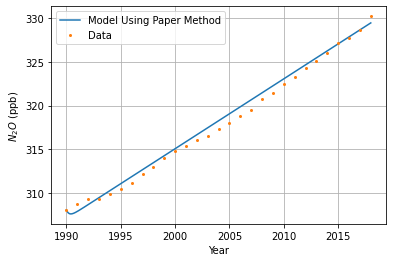

In [12]:
#Just to cross check, I also used the method in the paper

def function(t):                        #function of the integrated equation
  k0 = -(a0+m0+(m1/(ax/(7.80432*1000*1e-6))))/(ax/(7.80432*1000*1e-6))
  k1 = -m1/(ax/(7.80432*1000*1e-6))
  A = ppb[0]*7.80432*1000*1e-6 - k0
  return ((A*np.exp((ax/(7.80432*1000*1e-6))*t)+k0+k1*t)/(7.80432*1000*1e-6))

tspan = np.linspace(0,28,1000)
plt.plot(tspan +1990, function(tspan), label = 'Model Using Paper Method')
plt.plot(year[:-1], ppb[:-1], 'o',markersize='2', label='Data')
plt.xlabel('Year')
plt.ylabel('$N_2O$ (ppb)')
plt.grid()
plt.legend();

### Future Predictions 
Furthermore, four different alternative scenarios have been presented for the future development of global $N_2O$ emissions, during the time interval 2018 to 2100

1. Continuing Same Trend: During the period 2018 to 2100, the emissions continue increasing according to the trend estimated during the period 1990 to 2018.
2. Not Changing After 2018: The emissions stay at the same level as the initially estimated value at year 2018 from 2018 till 2100.
3. Stopping at 2050: The emissions after 2018 are reduced with a constant amount each year, such that the emissions stop by 2050 year.
4. Stopping at 2100: The emissions after 2018 are reduced with a constant amount each year, such that the emissions stop by 2100 year.

For each scenario, we have different set of parameters for the differential equation:

Case 1: Same parameters

Case 2:

*   $m_0 =$ Atmospheric Concentration in the year 2018
*   $m_1$ becomes zero

Case 3: 

*   $m_0 =$ Atmospheric Concentration in the year 2018 - correction factor
*   $m_1 =$ slope for the emissions curve to reach 0 in the year 2100

Case 4:

*   $m_0 =$ Atmospheric Concentration in the year 2018 - correction factor
*   $m_1 =$ slope for the emissions curve to reach 0 in the year 2050

We add a correction factor as we found the equations for emissions by obtaining the value in the year 2018 and the year at which the emissions reach 0, while the differential equation starts in the year 1990 as mentioned previously: $t = year - 1990$.


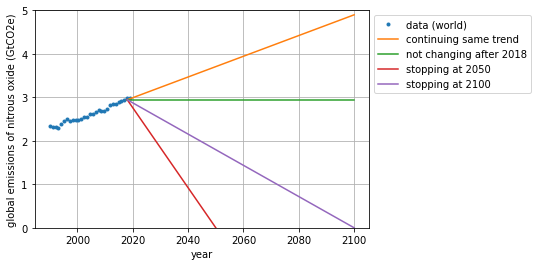

In [13]:
time = np.linspace(2018,2100,5)
#predictions will be based on what we have for the duration from 1990-2018
m0new = m0 +m1*(2018-1990)

emission1 = m0 +m1*(time-1990) 
emission2 = m0new*np.ones(len(time-1990))
emission3 = m0new - (time-1990)*m0new/(2050-2018) - (1990-2018)*m0new/(2050-2018)
emission4 = m0new - (time-1990)*m0new/(2100-2018) - (1990-2018)*m0new/(2100-2018)
plt.plot(xfit,dnoxx,'.',time, emission1, time, emission2, time, emission3, time, emission4)

plt.ylim(0,5) #concentrations cant go negative
plt.xlabel('year')
plt.ylabel('global emissions of nitrous oxide (GtCO2e)') #units in Gt CO2 equivalent
plt.grid()
plt.legend(['data (world)','continuing same trend','not changing after 2018',\
            'stopping at 2050','stopping at 2100'], loc='best', bbox_to_anchor=(1, 1));

## Results and Discussion



Below are the four different alternative scenarios for the future development of $N_2O$ level in the atmosphere, during the time interval 2018 to 2100. The scenarios are based on the global emission scenarios found in the previous cell.

0.0

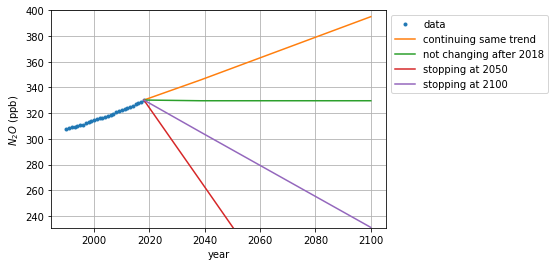

In [14]:
from scipy.integrate import odeint
y0 = np.array([ppb[-2]])
t1 = np.linspace(28,110,5)

def ode1(x,t1):
  return (a0 + ax*x + m0 + m1*t1)/(7.80432*1000*1e-6)
def ode2(x,t1):
  return (a0 + ax*x + m0new + 0*(t1))/(7.80432*1000*1e-6)
def ode3(x,t1):
  return (a0 + ax*x + m0new - (1990-2018)*m0new/(2050-2018) - m0new/(2050-2018)*(t1))/(7.80432*1000*1e-6)
def ode4(x,t1):
  return (a0 + ax*x + m0new - (1990-2018)*m0new/(2100-2018) - m0new/(2100-2018)*(t1))/(7.80432*1000*1e-6)

sol1 = odeint(ode1, y0, t1)
sol2 = odeint(ode2, y0, t1)
sol3 = odeint(ode3, y0, t1)
sol4 = odeint(ode4, y0, t1)
plt.plot(year[:-1], ppb[:-1], '.', t1+1990, sol1,t1+1990, sol2,t1+1990, sol3,t1+1990, sol4)
plt.xlabel('year')
plt.ylabel('$N_2O$ (ppb)')
plt.grid()
plt.legend(['data','continuing same trend','not changing after 2018','stopping at 2050',\
            'stopping at 2100','data'], loc='best', bbox_to_anchor=(1, 1));
plt.ylim(xeq,400);
ode3(xeq,60) #at xeq, at 2050, emissions will be 0

The emissions being reduced contribute to the dramatic fall of the concentration level after 2050 in this scenario. When the emissions would be zero after 2050, the concentration level would converge to the equilibrium level of 230.83 ppb. 

## Conclusion



Throughout this project, we worked together on modeling the dynamics of the greenhouse gases. In my case, Nitrous Oxide was the gas to be modeled. We used functions from python such as curve_fit, odeint, solve_ivp etc to model the emissions and concentrations as well as the future predictions. The results obtained are in sync with the reference paper as well.

Finally, we have explored how the nitrous oxide levels can be dynamically chaged using the discussed emission models. We also discussed and produced the detailed future predictions of the the possible developments with four cases. 

## References

1. https://medcraveonline.com/IRATJ/IRATJ-06-00197.pdf
2. https://gml.noaa.gov/ccgg/trends/data.html
3. https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE
4. https://sci-hubtw.hkvisa.net/10.1038/s41586-020-2780-0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb3bc87c-d2b4-4300-9253-eaf4f64b616f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>